In [25]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
from sklearn.model_selection import train_test_split
from time import time
%matplotlib inline

rng = np.random.RandomState(42)
datasets_dir = Path('model-datasets')

print('Loaded!')

Loaded!


In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
X_train = np.load('train-Xray-features.npy')
X_test = np.load('test-Xray-features.npy')
X_val = np.load('val-Xray-features.npy')
y_test = np.load('test-Xray-truth.npy')
y_val = np.load('val-Xray-truth.npy')
y_train = np.load('train-Xray-truth.npy')

In [4]:
# X_train = np.load('train-Binary-Xray-features.npy')
# X_test = np.load('test-Binary-Xray-features.npy')
# X_val = np.load('val-Binary-Xray-features.npy')
# y_test = np.load('test-Binary-Xray-truth.npy')
# y_val = np.load('val-Binary-Xray-truth.npy')
# y_train = np.load('train-Binary-Xray-truth.npy')

# Transfer Learning

### Hyperparameters

In [6]:
# hyperparameters
img_width = img_height = 224
img_dim = (img_width, img_height)
n_epochs = 100
# learning_rate = 1e-3

In [6]:
# for learning_rate in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
# # best lr=1e-3

#     model = Sequential()
#     model.add(Dense(2, activation='softmax', input_shape=(2048,)))

#     model.compile(loss='categorical_crossentropy',
#                  optimizer=Adam(learning_rate=learning_rate),
#                  metrics=['accuracy'])

#     start = time()
#     run = model.fit(x=X_train,
#                     y=y_train,
#                     epochs=n_epochs,
#                     validation_data=(X_val, y_val),
#                     verbose=0,
#                     workers=-1)
#     print(f'\n\n learning rate: {learning_rate}, max: {np.max(run.history["val_accuracy"])}\n{(time() - start) / 60:.2f} min')
    
#     fig, ax = plt.subplots()
#     ax.plot(range(len(run.history['val_accuracy'])), run.history['val_accuracy'])
#     ax.set(title=f'lr: {learning_rate}, Val accuracy over epochs', ylabel='Val acc', xlabel='Epochs')
#     plt.show()



 learning rate: 0.001, max: 0.6385542154312134
0.11 min


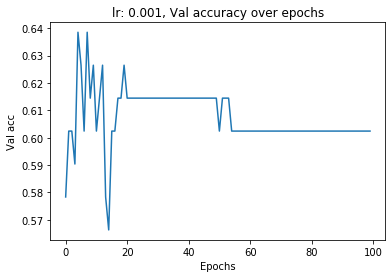

In [37]:
# four class classification
n_epochs = 100
names = ['Dense1','Dense2', 'Final']
# for learning_rate in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
for learning_rate in [1e-3]:
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(2048,), name='Dense1'))
    model.add(Dense(512, activation='relu', name='Dense2'))
    model.add(Dense(4, activation='softmax', name='Final'))

    model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])

    start = time()
    run = model.fit(x=X_train,
                    y=y_train,
                    epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    verbose=0,
                    workers=-1)
    print(f'\n\n learning rate: {learning_rate}, max: {np.max(run.history["val_accuracy"])}\n{(time() - start) / 60:.2f} min')
    
    fig, ax = plt.subplots()
    ax.plot(range(len(run.history['val_accuracy'])), run.history['val_accuracy'])
    ax.set(title=f'lr: {learning_rate}, Val accuracy over epochs', ylabel='Val acc', xlabel='Epochs')
    plt.show()



 learning rate: 0.001, max: 0.6987951993942261
0.55 min


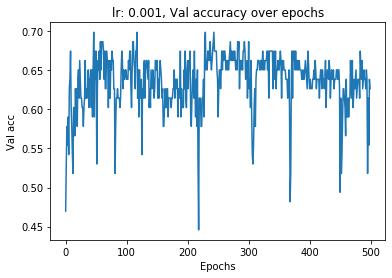

In [38]:
# four class classification
n_epochs = 500
names = ['Dense1','Dense2', 'Final']
# for learning_rate in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
for learning_rate in [1e-3]:
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(2048,), name='Dense1',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(512, activation='relu', name='Dense2',
                    kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(4, activation='softmax', name='Final'))

    model.compile(loss='categorical_crossentropy',
                 optimizer=Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])

    start = time()
    run = model.fit(x=X_train,
                    y=y_train,
                    epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    verbose=0,
                    workers=-1)
    print(f'\n\n learning rate: {learning_rate}, max: {np.max(run.history["val_accuracy"])}\n{(time() - start) / 60:.2f} min')
    
    fig, ax = plt.subplots()
    ax.plot(range(len(run.history['val_accuracy'])), run.history['val_accuracy'])
    ax.set(title=f'lr: {learning_rate}, Val accuracy over epochs', ylabel='Val acc', xlabel='Epochs')
    plt.show()

In [41]:
print(l1_ball)

0.0001




 learning rate: 0.001, max: 0.4457831382751465
0.55 min


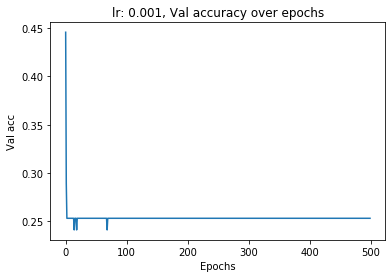



 learning rate: 0.001, max: 0.6626505851745605
0.55 min


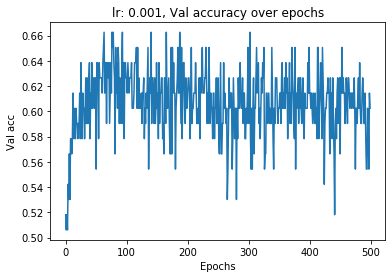



 learning rate: 0.001, max: 0.6867470145225525
0.55 min


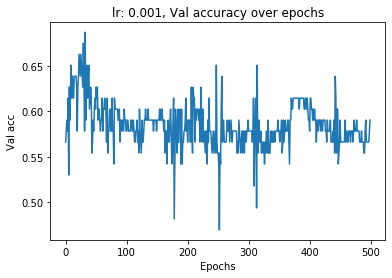



 learning rate: 0.001, max: 0.6626505851745605
0.55 min


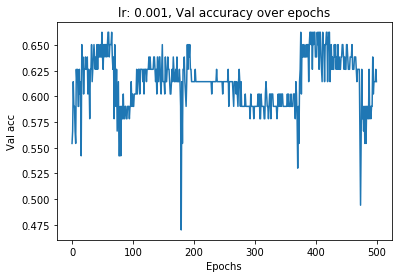

In [40]:
# four class classification
n_epochs = 500
names = ['Dense1','Dense2', 'Final']
# for learning_rate in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
for learning_rate in [1e-3]:
    for l1_ball in [1e-1, 1e-2, 1e-3, 1e-4]:
        model = Sequential()
        model.add(Dense(512, activation='relu', input_shape=(2048,), name='Dense1',
                        kernel_regularizer=regularizers.l1(l1_ball)))
        model.add(Dense(512, activation='relu', name='Dense2',
                        kernel_regularizer=regularizers.l1(l1_ball)))
        model.add(Dense(4, activation='softmax', name='Final'))

        model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=learning_rate),
                     metrics=['accuracy'])

        start = time()
        run = model.fit(x=X_train,
                        y=y_train,
                        epochs=n_epochs,
                        validation_data=(X_val, y_val),
                        verbose=0,
                        workers=-1)
        print(f'\n\n learning rate: {learning_rate}, max: {np.max(run.history["val_accuracy"])}\n{(time() - start) / 60:.2f} min')

        fig, ax = plt.subplots()
        ax.plot(range(len(run.history['val_accuracy'])), run.history['val_accuracy'])
        ax.set(title=f'lr: {learning_rate}, Val accuracy over epochs', ylabel='Val acc', xlabel='Epochs')
        plt.show()



 learning rate: 0.001, max: 0.28915661573410034
0.56 min


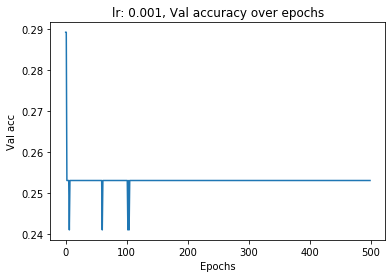



 learning rate: 0.001, max: 0.6987951993942261
0.55 min


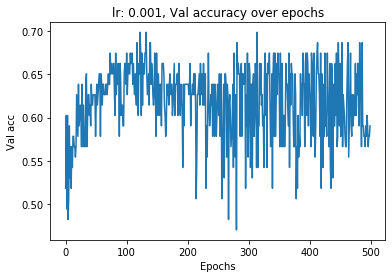



 learning rate: 0.001, max: 0.6987951993942261
0.54 min


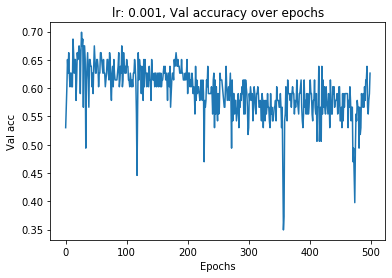



 learning rate: 0.001, max: 0.6867470145225525
0.56 min


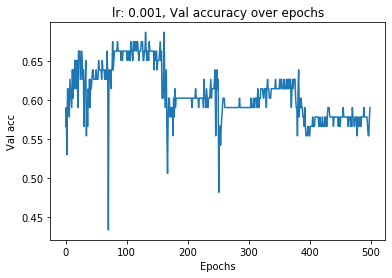

In [42]:
# four class classification
n_epochs = 500
names = ['Dense1','Dense2', 'Final']
# for learning_rate in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
for learning_rate in [1e-3]:
    for l1_ball in [1e-1, 1e-2, 1e-3, 1e-4]:
        model = Sequential()
        model.add(Dense(512, activation='relu', input_shape=(2048,), name='Dense1',
                        kernel_regularizer=regularizers.l1(l1_ball)))
        model.add(Dense(512, activation='relu', name='Dense2',
                        kernel_regularizer=regularizers.l1(l1_ball)))
        model.add(Dense(4, activation='softmax', name='Final'))

        model.compile(loss='categorical_crossentropy',
                     optimizer=Adam(learning_rate=learning_rate),
                     metrics=['accuracy'])

        start = time()
        run = model.fit(x=X_train,
                        y=y_train,
                        epochs=n_epochs,
                        validation_data=(X_val, y_val),
                        verbose=0,
                        workers=-1)
        print(f'\n\n learning rate: {learning_rate}, max: {np.max(run.history["val_accuracy"])}\n{(time() - start) / 60:.2f} min')

        fig, ax = plt.subplots()
        ax.plot(range(len(run.history['val_accuracy'])), run.history['val_accuracy'])
        ax.set(title=f'lr: {learning_rate}, Val accuracy over epochs', ylabel='Val acc', xlabel='Epochs')
        plt.show()

In [19]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 512)               1049088   
_________________________________________________________________
Dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
Final (Dense)                (None, 4)                 2052      
Total params: 1,313,796
Trainable params: 1,313,796
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.get_layer(name='Dense1')